# Data Loader - Custom Image Data Generator to Load 3D .npy Files

In [ ]:
#importing required Libraries
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import os
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)

In [ ]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    # Keras needs the generator to be infinite, so we will use while True
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X, Y)  # A tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

def load_img(img_dir, img_list):
    images = []
    for i, image_name in enumerate(img_list):
        if image_name.endswith('.npy'):
            image = np.load(os.path.join(img_dir, image_name))
            images.append(image)
    images = np.array(images)
    return images


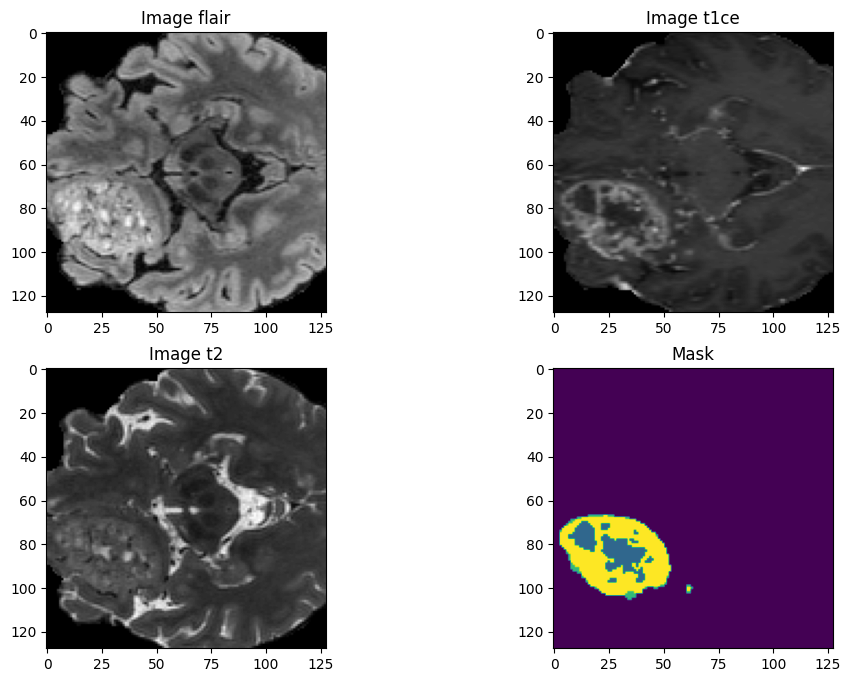

In [ ]:
#Test the generator - verify all image modality and mask is matching or not

from matplotlib import pyplot as plt
import random
# Here is the path of Train images and Masks directory (Where .npy fiels are stored)
train_img_dir = "/content/drive/MyDrive/Brats-2021-Dataset/BraTS2021_NPY_Files/train_images/"
train_mask_dir = "/content/drive/MyDrive/Brats-2021-Dataset/BraTS2021_NPY_Files/train_masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)
# set the batch as per available memory
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
#Define the image generators for training and validation and testing

train_img_dir = "/content/drive/MyDrive/Brats-2021-Dataset/BraTS2021_NPY_Files/train_images/"
train_mask_dir = "/content/drive/MyDrive/Brats-2021-Dataset/BraTS2021_NPY_Files/train_masks/"

val_img_dir = "/content/drive/MyDrive/Brats-2021-Dataset-val/BraTS2021_NPY_Files/val_images"
val_mask_dir = "/content/drive/MyDrive/Brats-2021-Dataset-val/BraTS2021_NPY_Files/val_masks"

test_img_dir = "/content/drive/MyDrive/Brats-2021-Dataset-test/BraTS2021_NPY_Files/test_images"
test_mask_dir = "/content/drive/MyDrive/Brats-2021-Dataset-test/BraTS2021_NPY_Files/test_masks"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

test_img_list=os.listdir(test_img_dir)
test_mask_list = os.listdir(test_mask_dir)

In [ ]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                 val_mask_dir, val_mask_list, batch_size)

test_img_datagen = imageLoader(test_img_dir, test_img_list,
                                 test_mask_dir, test_mask_list, batch_size)

ValueError: ignored

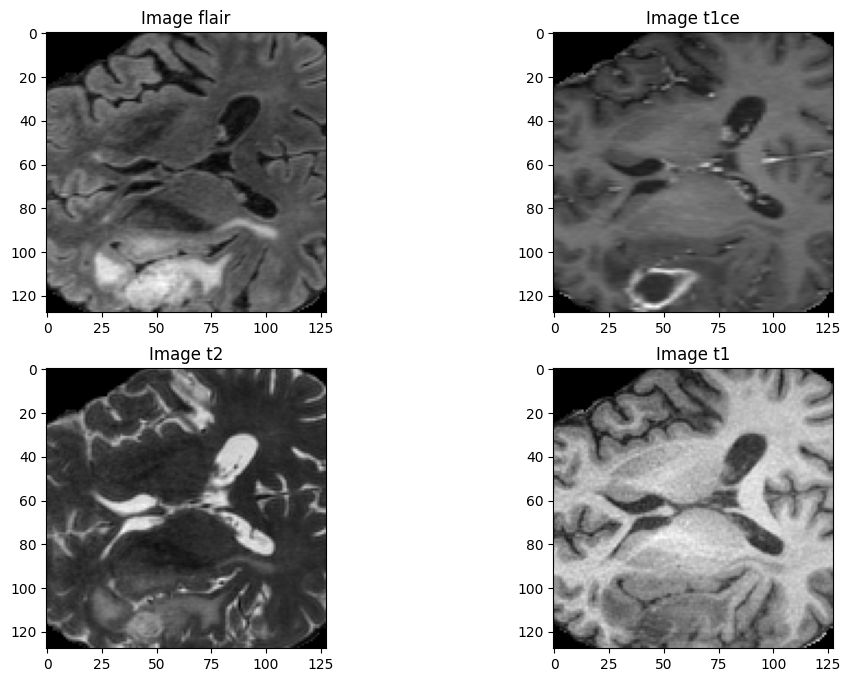

In [ ]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
plt.title('Image t1')
plt.subplot(225)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()